# Aribnb Data Analysis: Seattle and Boston
## Udacity Data Scientist Nanodegree Project 1

## Questions:

### - Q1: How is the price variation throughout the year? Which month is the most expensive one to rent a room?
### - Q2: Can the price be predicted using the data provided?
### - Q3: Wich city is more expensive (higher avarege price): Boston or Seattle?
### - Q4: The prices behave in the say manner in both cities (according to Q1)?

In [224]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Seattle Airbnb Data

In [146]:
sea_list = pd.read_csv('./Data/Airbnb/Seattle/listings.csv', thousands=',')
sae_cal = pd.read_csv('./Data/Airbnb/Seattle/calendar.csv', thousands=',')

## Question 1: How is the price variation throughout the year? Which month is the most expensive one to rent a room?

### Analysing the calendar database

In [147]:
sae_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [148]:
sae_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [208]:
# Creating a dataset only with the registers that have a price
sea_cal_pr = sae_cal[sae_cal['available'] == 't']

In [209]:
sea_cal_pr.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [210]:
# Droping the id and avaiable columns and changing the type of the price column to float
sea_cal_pr = sea_cal_pr.drop(columns = ['listing_id', 'available'])
sea_cal_pr['price'] = sea_cal_pr['price'].apply(lambda x: x.replace('$', '')).apply(lambda y: y.replace(',', '')).astype(float)

# Obtaining the month of each date and saving it as a new feature
sea_cal_pr['month'] = sea_cal_pr['date'].apply(lambda z: z.split('-')[1]).astype(int)

# Obtaining the average price for each day
sea_cal_pr_month = sea_cal_pr.groupby(['month']).mean()
sea_cal_pr_month

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


### Checking the price distribuition 

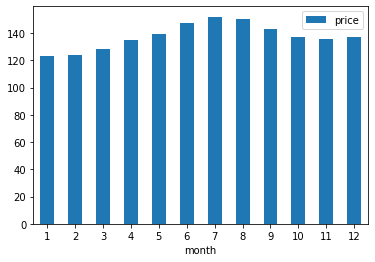

In [223]:
sea_cal_pr_month.plot.bar(rot=0);

## Answer to Q1:

### This graph shows us an important information: the prices begin to rise when summer is approaching (June, July and August), reaching maximum value  in July. It makes sense because a lot of people usually travel in their summer vacation. 
### After the summer, the prices tend to reduce.



## Question 2: Can the price be predicted using the data provided?